# ¡Llena ese carrito!

# Descripción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos tiene modificaciones del original. Reduje el tamaño del conjunto para que los cálculos se hicieran más rápido. Tuve cuidado de conservar las distribuciones de los datos originales al realizar los cambios.

## Diccionario de datos

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.

- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.

- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
    
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Plan de solución

Primero Importaré la librería Pandas, para poder leer los DataFrames, posteriormente con ayuda del método info() verificaré que los tipos de datos correspondan al DataSet, y con el método head() dare un vistazo de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt 

import numpy as np


In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('./datasets/products.csv', sep=';')
df_aisles = pd.read_csv('./datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('./datasets/departments.csv', sep=';' )
df_order_product = pd.read_csv('./datasets/order_products.csv', sep=';')

In [3]:
# funcion para obtener informacion general de los DF 
def leer_data(df):
    print(df.head())
    df.info()

In [4]:
leer_data(df_orders)

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [5]:
leer_data(df_products)

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
leer_data(df_aisles)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
leer_data(df_departments)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
leer_data(df_order_product)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


En el primer DF orders, contiene columnas que se podrían considerar como categóricas y tienen un tipo de datos INT cuando bien podria ser considerado un string, como en el caso de la columna , 'order_dow'. En el caso de 'days_since_prior_order' el tipo de datos es float, cuando podria ser considerado un int, y tambien en esta ultima hay una cantidad considerable de valores nulos. 


Y por ultimo en el DF 'df_order_product' el tipo de datos de la columna 'reordered' es del tipo int, cuando es categórica la variable.




# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrir los tipos de datos.
- Identificar y completar los valores ausentes.
- Identificar y eliminar los valores duplicados.

## Plan de solución

Para empezar verificare si existen valores duplicados en cada unos de los DataSets, en algunos se cuentan con tipos de datos object, por lo cual es relevante revisar si existen espacios extras, modificar las palabras a mayusculas o minusculas. Haré uso del método duplicated + sum para obtener aquellas filas duplicadas dentro del DF y asi mismo utilizaré el parametro subset= para corroborar cada una de las columnas. Al encontrar valores duplicados relevantes se puede implementar el metodo drop_duplicates con inplace=True para eliminarlos del DF, tambien se puede hacer filtros para una Series y descubrir si hay valores engañosos. Por último con ayuda del metodo value_counts se puede identificar aquellos valores duplicados en una columna incluso si son NaN.

Para los valores ausentes se implementara el método isna para encontrar valores ausentes en los DF, una vez que sean identificados se evaluará si es necesario eliminarlos o cambiarlos para no afectar el Data Set, además es posible que se requiera uso de filtros para ubicar en que columnas de los DataFrames tienen relacion con otras. Esto ayudara a definir su situación. En caso de requerir hacer modificaciones en los datos ausentes se puede considerar el uso de fillna o replace.  

Por Último para el cambio en tipo de datos con el método astype se puede lograr el cambio.

### `instacart_orders` data frame

In [9]:
# Revisar si hay pedidos duplicados
print(df_orders.duplicated().sum())


15


In [10]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
miercoles_2 = df_orders[(df_orders['order_dow']== 3) & (df_orders['order_hour_of_day'] == 2)]
miercoles_2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [11]:
# Eliminar los pedidos duplicados
print(df_orders.drop_duplicates(inplace=True))

None


In [12]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().sum())

0


In [14]:
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].astype("Int64")

En el DF df_orders existian 15 valores duplicados, con ayuda del método duplicated + sum logre visualizar cuantos valores existían, después aplicando un filtro con el método duplicated visualice los 15 valores los cuales coincidian en el con pedidos hechos el miércoles a las 2 am. posteriormente con el método drop.duplicates y aplicando el inplace=True, elimine estos valores. Por último aplique un filtro en la columna 'order_id' con el método value_counts() para confirmar que han sido eliminados del DF.   

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())


0


In [16]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products['department_id'].duplicated().sum()

49673

In [17]:
# Revisa únicamente si hay nombres duplicados de productos, convertirlos en mayusculas para visualizar mejor los datos
df_products['product_name'] =  df_products['product_name'].str.upper()

# revisar si hay valores duplicados
df_products.duplicated().sum()

0

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[(~df_products['product_name'].isna()) & df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Primeramente aplique el metodo duplicated para revisar si en el DF existian valores duplicados, pero arrojo 0. Después revise en la columna 'department_id' y encontre una gran cantidad de valores duplicados, esto se debe a que son pocos los departamentos donde se acomodan los productos. Posteriormente en la columna 'product_name' se hallaron 1361 valores duplicados, de los cuales 1258 son valores NaN, esto con la ayuda del método value_counts(dropna=False) el cual incluye los valores unicos y los None de una Series. 

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

0

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

0

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
df_order_product.duplicated().sum()

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_product.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered']).sum()

0

Aplique el método duplicated para verificar que no existieran valores duplicados, esto arrojo 0 valores, posteriormente aplique el metodo duplicated con el parametro subset para verificar cada una de las columnas y descubir algun valor engañoso, pero como al contar con valores de tipo int y float, no hay la posibilidad que tengan espacios extras, o que algunos esten en mayusculas. 

## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products['product_name'].isna().sum()

1258

En la columna 'product_name' se encuentran 1258 valores ausentes

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_ausentes = df_products[df_products['product_name'].isna()]

productos_ausentes[productos_ausentes['aisle_id'] == 100]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Al usar el método isna en la columna'product_name' se puede observar que hay muchos valores ausentes relacionados con el aisle_id 100 pero para confirmarlo se hace una condicion en la columna aisle y el valor que nos arroja es True, por lo cual se puede concluir que todos los valores ausentes estan relacionados con aisle_id 100

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos_ausentes[productos_ausentes['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Nuevamamente el DF se observa que los productos ausentes estan relacionados con el department id 21 al aplicar una nueva condicion se puede confirmar que si estan relacionados.

In [28]:
# Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
filtro_ausentes = productos_ausentes[(productos_ausentes['aisle_id'] == 100) & (productos_ausentes['department_id'] == 21)]
filtro_ausentes


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


En el DF se observa que todos los productos ausentes tienen una relación con el pasillo 100 y el departamento 21 

In [29]:
# Completar los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknow')

In [30]:
# Revisar si aun existen valores ausentes
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [31]:
# Comprobar que los cambios se hayan realizado 
df_products[df_products['product_name'] =='Unknow']

,product_id,product_name,aisle_id,department_id
37,38,Unknow,100,21
71,72,Unknow,100,21
109,110,Unknow,100,21
296,297,Unknow,100,21
416,417,Unknow,100,21
...,...,...,...,...
49552,49553,Unknow,100,21
49574,49575,Unknow,100,21
49640,49641,Unknow,100,21
49663,49664,Unknow,100,21



Se encontraron 1258 valores ausentes dentro de la columna product_name los cuales tienen una relación con las columnas aisle_id 100 y department_id 21, al ubicar estos valores ausentes se decidio rellenarlos con el metodo fillna y como nuevo valor se le asigno "Unknow", al final se hizo una comprobacion para corroborrar que los datos habian sido modificados.

### `orders` data frame

In [32]:
# Encuentra los valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [33]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
filtro_pedidos =df_orders[(df_orders['order_number'] == 1) & (df_orders['days_since_prior_order'].isna())]
filtro_pedidos


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,<NA>
96,787445,25685,1,6,18,<NA>
100,294410,111449,1,0,19,<NA>
103,2869915,123958,1,4,16,<NA>
104,2521921,42286,1,3,18,<NA>
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,<NA>
478896,2222353,141211,1,2,13,<NA>
478922,2272807,204154,1,1,15,<NA>
478926,2499542,68810,1,4,19,<NA>


Al revisar los valores ausentes de la columna `days_since_prior_order` se detecto que todos son el primer y unico pedido del cliente.

### `order_products` data frame

In [34]:
# Encuentra los valores ausentes
print(df_order_product.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valores_max_min = (df_order_product['add_to_cart_order'].min(), df_order_product['add_to_cart_order'].max()) 
valores_max_min


(1.0, 64.0)

Hay 836 valores ausentes en la columna add_to_cart_order. El valor minimo de esta columna es 1 y el maximo es 64

In [36]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
filtro_ausente_cart = df_order_product[df_order_product['add_to_cart_order'].isna()]
filtro_ausente_cart

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [37]:
# identificar valores unicos de `order_id` que presentan NaN en add_to_cart_order
extraer_order_id = filtro_ausente_cart['order_id'].unique()
extraer_order_id

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [38]:
# conteo de valores unicos 
filtro_ausente_cart['order_id'].nunique()

70

In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
product_nan = filtro_ausente_cart[filtro_ausente_cart['order_id'].isin(extraer_order_id)].groupby(
    'order_id')['product_id'].count().sort_values(ascending=False)
product_nan

order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
1598369     1
747668      1
1677118     1
9310        1
Name: product_id, Length: 70, dtype: int64

Con base en los resultados no existen en la columna `order_id` pedidos con mas de 64 productos.

In [40]:
# Remplazar los valores ausentes en la columna 'add_to_cart? con 999 y convertir la columna al tipo entero.
df_order_product['add_to_cart_order'] = df_order_product['add_to_cart_order'].fillna(999)

In [41]:
# convertir la columna a entero 
df_order_product['add_to_cart_order'] = df_order_product['add_to_cart_order'].astype('int')

In [42]:
# mostrar los valores NaN rellenados con 999
df_order_product[df_order_product['add_to_cart_order'] == 999]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


In [43]:
# confirmar el cambio de tipo de dato a 'int' de la columna add_to_cart_order 
df_order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Se reemplazaron los valores ausentes con 999 con ayuda del método fillna y para cambiar el tipo de datos de la columna "add_to_cart_order" se uso el metodo astype, por ultimo corroborre los cambios creando una variable llamada comprobar_1 y llame a info para verificar la columna se modifico a int.

Dentro de los conjuntos de datos existian algunas columnas que contenian muchos valores duplicados y ausentes, por lo cual fue necesario implementar algunos cambios en los DF para un mejor manejo de la data. asimismo hay algunos que se conservaron ya que si se eliminaban era posible afectar de manera significativa, por lo cual se opto por reemplazar esos valores. 


# Paso 3. Análisis de los datos

# [A] Fácil (deben completarse todos para aprobar)

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [44]:
# verificación de la columna order_hour_of_day
dias_order = sorted(df_orders['order_hour_of_day'].unique())
dias_order

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [45]:
# verificar los datos de la columna order_dow
datos_semana = sorted(df_orders['order_dow'].unique())
datos_semana

[0, 1, 2, 3, 4, 5, 6]

Al verificar los valores unicos dentro de las columnas order_hour_of_day y order_dow se puede observar que cuentan con datos razonables, por lo cual no es necesario realizar cambios. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

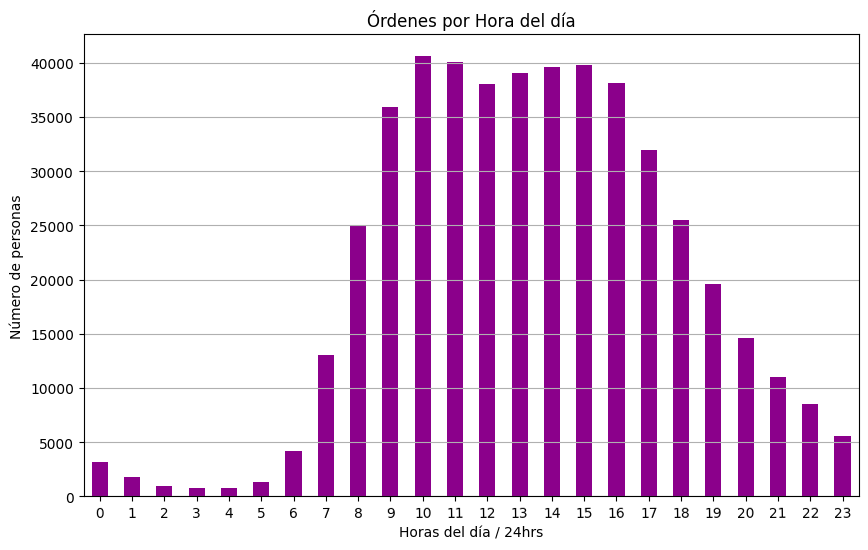

In [46]:
# filtro para agrupar órdenes hechas por hora del día 
pedidos_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].count()

# gráfica de órdenes por hora del día  
pedidos_por_hora.plot(kind='bar', 
                      figsize=(10, 6), 
                      title='Órdenes por Hora del día',
                      xlabel=('Horas del día / 24hrs'), 
                      ylabel=('Número de personas'),
                      rot=1,
                     color='darkmagenta')
plt.grid(axis='y')
plt.show()


De acuerdo al gráfico las horas en las que se presentan más números de órdenes es de las 9 am hasta las 16 pm.  

### [A3] ¿Qué día de la semana compran víveres las personas?

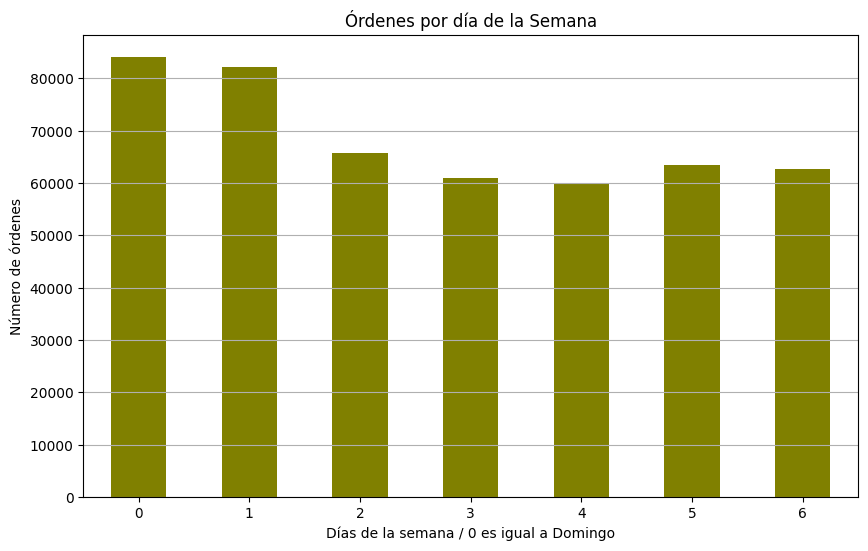

In [47]:
# Filtro para agrupar los pedidos realizados por día de la semana 
compras_por_semana = df_orders.groupby('order_dow')['user_id'].count()

# Gráfica de órdenes realizadas por dia de la semana
compras_por_semana.plot(title='Órdenes por día de la Semana',
                        xlabel='Días de la semana / 0 es igual a Domingo',
                        ylabel='Número de órdenes',
                        kind='bar',
                        figsize=(10,6),
                        color='olive',
                       rot = 1)
plt.grid(axis='y')
plt.show()


La gráfica muestra que los días en los que se realizan mayores ordenes son los Domingos(0) y Lunes (1), mientras los dias que disminuyen las órdenes son los Jueves (4)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

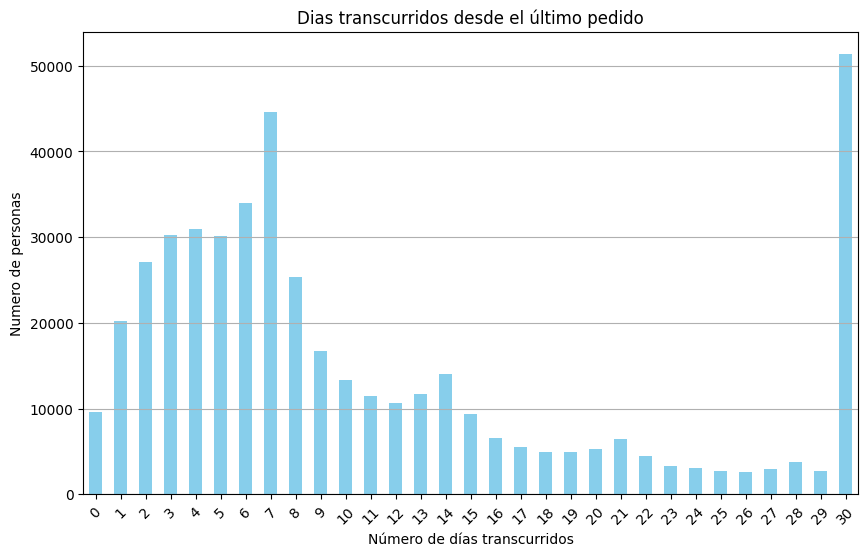

In [48]:
#Filtro para agrupar los dias desde que el cliente hizo un pedido 
tiempo_espera = df_orders.groupby('days_since_prior_order')['user_id'].count()

# Gráfica de los días que han transcurrido desde el último pedido del cliente
tiempo_espera.plot(title='Dias transcurridos desde el último pedido',
                   xlabel='Número de días transcurridos',
                   ylabel='Numero de personas',
                   kind='bar',
                   figsize=(10,6),
                   color='skyblue', 
                   rot=45)
plt.grid(axis='y')
plt.show()

In [49]:
# valores minimos y maximos de la columna `days_since_prior_order`

print(f"Valor minimo de dias transcurridos : {df_orders['days_since_prior_order'].min()}")
print(f"Valor maximo de dias transcurridos : {df_orders['days_since_prior_order'].max()}")

Valor minimo de dias transcurridos : 0
Valor maximo de dias transcurridos : 30


En la grafica se observa que los dias minimos que transcurren para que el cliente pida otra orden es de 0 dias y un maximo de 30 dias, de los cuales los más frecuentes que transcurren para que el cliente ordene nuevamente son 7 dias y 30 dias.  

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [50]:
# filtro para los miercoles
miercoles= df_orders['order_dow'] == 3
ordenes_miercoles = df_orders[miercoles]['order_hour_of_day'].value_counts().sort_index()


In [51]:
# filtro para los sabados
sabado = df_orders['order_dow'] == 6
ordenes_sabados = df_orders[sabado]['order_hour_of_day'].value_counts().sort_index()

In [52]:
# Uso de Concatenar para fusionar los filtros miercoles y sabado 
order_miercoles_sabado = pd.concat([ordenes_miercoles, ordenes_sabados], axis=1)

In [53]:
# renombrar columnas y mostrar resultados
order_miercoles_sabado.columns = ['Miércoles', "Sábado"]
order_miercoles_sabado

,Miércoles,Sábado
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


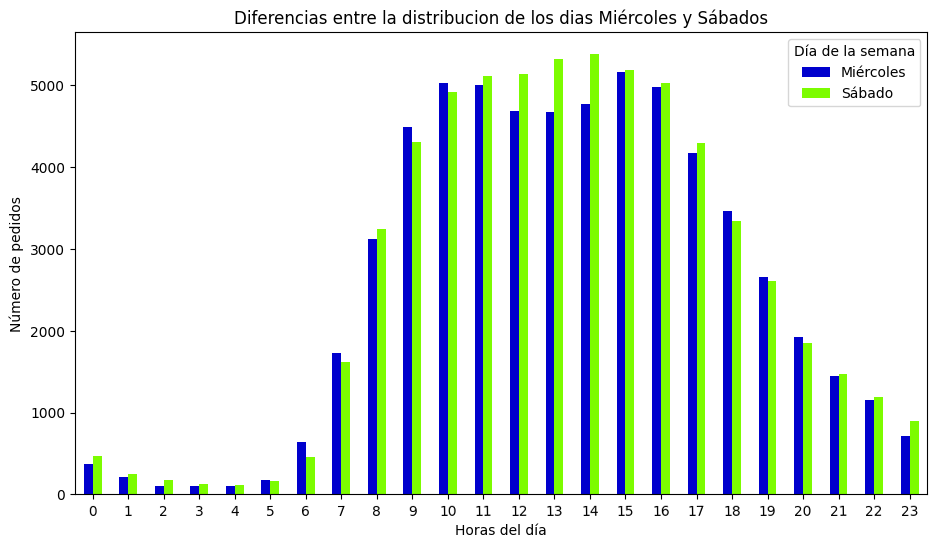

In [54]:
order_miercoles_sabado.plot(kind='bar',
                 title='Diferencias entre la distribucion de los dias Miércoles y Sábados',
                 xlabel='Horas del día',
                 ylabel='Número de pedidos',
                  figsize=(11,6),
                 color=['mediumblue', 'lawngreen'],
                 rot=1)
plt.legend(title='Día de la semana')
plt.show()

En el gráfico se puede observar que existe una diferencia entre los dos dias, ya que el sábado tiene un mejor numero de pedidos en casi todas las horas del día, aunque se podria considerar que esta diferencia no es tan significativa, ya que los miércoles tienen un considerable número de pedidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [55]:
order_user = df_orders.groupby('user_id')['order_id'].size().value_counts().sort_index()

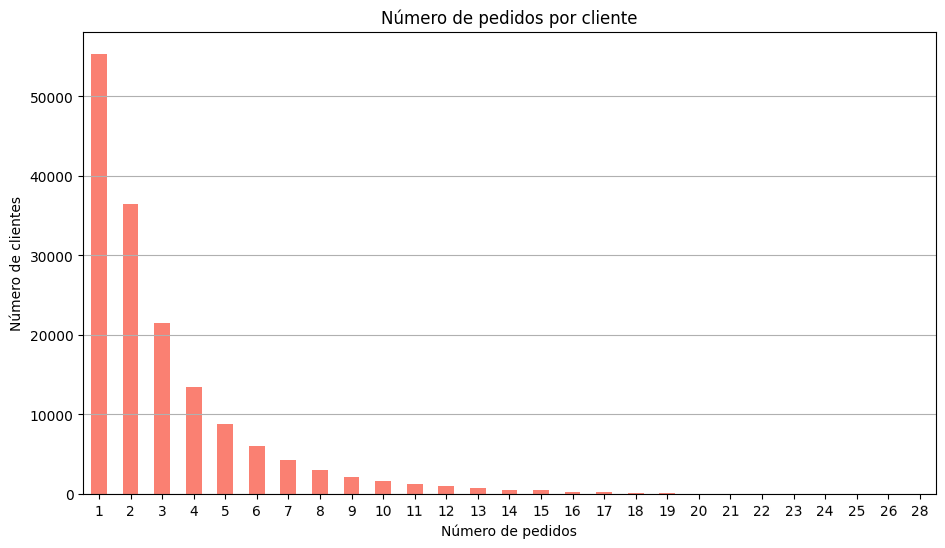

In [56]:
order_user.plot(title='Número de pedidos por cliente',
                         kind='bar',
                         xlabel='Número de pedidos',
                         ylabel='Número de clientes',
                         color='salmon',
                         figsize=(11,6), 
                         rot=1)
plt.grid(axis='y')
plt.show()

Se puede observar en el grafico que el numero de pedido mas frecuente es de 1, mientras que el menos frecuente es de 16 pedidos hechos por un cliente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [57]:
# hacer un merge entre orders y products
df_prueba = pd.merge(df_order_product, df_products, on ='product_id')

In [58]:
# agrupar los productos por product_id y name, crear una nueva columna llamada 'counts'
productos_vendidos = df_prueba.groupby(['product_id', 'product_name'])['product_name'].count().reset_index(name='counts')

In [59]:
# ordenar los productos descendentemente
productos_ordenados = productos_vendidos.sort_values(by='counts', ascending=False)

In [60]:
# obtener los 20 productos top
productos_ordenados.head(20)

,product_id,product_name,counts
22808,24852,BANANA,66050
12025,13176,BAG OF ORGANIC BANANAS,53297
19370,21137,ORGANIC STRAWBERRIES,37039
20077,21903,ORGANIC BABY SPINACH,33971
43271,47209,ORGANIC HASS AVOCADO,29773
43788,47766,ORGANIC AVOCADO,24689
43663,47626,LARGE LEMON,21495
15364,16797,STRAWBERRIES,20018
24047,26209,LIMES,19690
25556,27845,ORGANIC WHOLE MILK,19600


Se muestra una lista de los 20 productos mas vendidos incluyendo el Id, nombre y cantidad vendia de dichos productos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [61]:
# agrupar las order_id por el product_id y contarlos
total_producto_ordenes = df_order_product.groupby('order_id')['product_id'].count()

In [62]:
# Crear una variable para despues graficar
histo_valores = total_producto_ordenes.value_counts().sort_index()

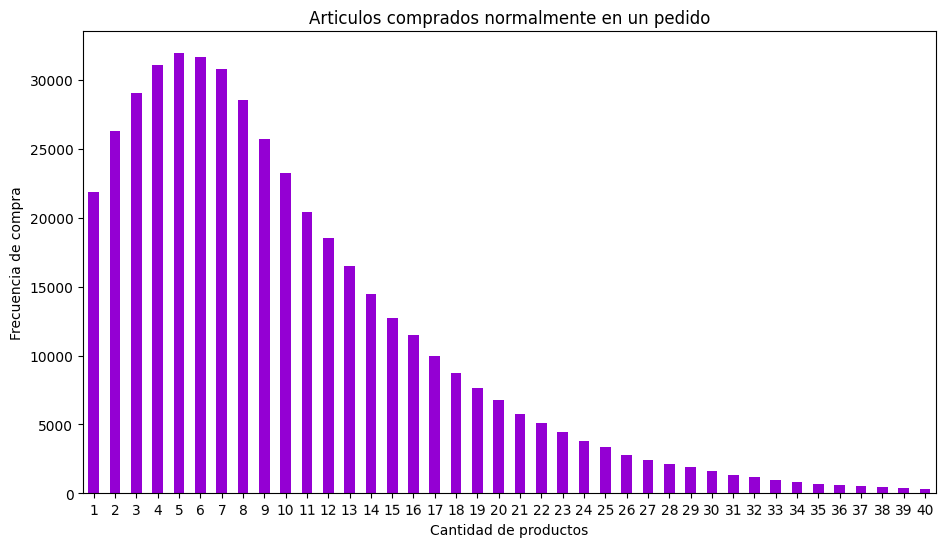

In [63]:
# graficar los resultados
histo_valores[histo_valores.index < 41].plot(kind= 'bar',
                   title='Articulos comprados normalmente en un pedido',
                   xlabel='Cantidad de productos',
                   ylabel='Frecuencia de compra', 
                    color='darkviolet', 
                    figsize=(11,6), 
                    rot=1)

plt.show()

La cantidad de articulos comprados en un pedido son en su mayoria de 1 a 10 articulos entre los mas frecuente. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [64]:
# unir DF product y order_product
df_combinados = pd.merge(df_order_product, df_products, on='product_id')

In [65]:
# agrupar por product_id y nombre del producto
articulos_recomprados = df_combinados.groupby(['product_id','product_name'])['reordered'].sum().reset_index()

In [66]:
# filtrar los articulos que han sido comprados mas de 1 vez y ordenarlos 
articulos_recomprados = articulos_recomprados[articulos_recomprados['reordered'] > 1].sort_values(by='reordered', ascending=False)

In [67]:
## imprimir articulos con mayor frecuencia
articulos_recomprados.head(20)


,product_id,product_name,reordered
22808,24852,BANANA,55763
12025,13176,BAG OF ORGANIC BANANAS,44450
19370,21137,ORGANIC STRAWBERRIES,28639
20077,21903,ORGANIC BABY SPINACH,26233
43271,47209,ORGANIC HASS AVOCADO,23629
43788,47766,ORGANIC AVOCADO,18743
25556,27845,ORGANIC WHOLE MILK,16251
43663,47626,LARGE LEMON,15044
25666,27966,ORGANIC RASPBERRIES,14748
15364,16797,STRAWBERRIES,13945


En la siguiente tabla se muestran los articulos top 20 han sido recomprados, se observa que el producto mas comprado son las Bananas con un total de 55,763 veces. Le sigue las Bag of organic bananas con un total de 44,450 veces y las organic strawberries con 28,639.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [68]:
# calcular la proporcion de productos reordenados
product_mean_reorder = df_combinados.groupby(['product_id' , 'product_name']).agg(
    order = ('order_id','mean'),
    reorder = ('reordered','mean')
    ).reset_index()

In [69]:
product_mean_reorder

,product_id,product_name,order,reorder
0,1,CHOCOLATE SANDWICH COOKIES,1.804142e+06,0.564286
1,2,ALL-SEASONS SALT,2.026506e+06,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,1.628411e+06,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,1.701135e+06,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,1.677574e+06,0.500000
...,...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,1.972524e+06,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,1.701989e+06,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,1.928967e+06,0.416667
45571,49693,SPRING WATER BODY WASH,1.424382e+06,0.440000


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [70]:
# crear un merge con df_order y df_order_product
df_merge = pd.merge(df_orders, df_order_product, on='order_id')

In [71]:
# agrupar por user_id y reordered para verificar sus pedidos y aplicar mean()
pedido_cliente = df_merge.groupby('user_id')['reordered'].mean()

In [72]:
# imprimir resultado
pedido_cliente

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [75]:
# filtro de la columna add_to y condicion a 1 
primeros_productos = df_combinados[df_combinados['add_to_cart_order'] == 1]

In [ ]:
# Se agrupa por las columnas id y name, se hace el conteo por la columna product_id y se ordenan de manera descendente
contar_productos = primeros_productos.groupby(['product_id', 'product_name'])['add_to_cart_order'].count().sort_values(ascending=False)

product_id  product_name                                               
24852       BANANA                                                         15562
13176       BAG OF ORGANIC BANANAS                                         11026
27845       ORGANIC WHOLE MILK                                              4363
21137       ORGANIC STRAWBERRIES                                            3946
47209       ORGANIC HASS AVOCADO                                            3390
                                                                           ...  
10981       CLOUD WHITE DECORATING CUPCAKE ICING                               1
10985       PREMIUM TWIN PACK ROCK CORNISH GAME HEN                            1
38272       ORGANIC RAW COCONUT FLOUR                                          1
10989       GARBAGE DISPOSAL FRESHENER & CLEANER RED PEAR WITH MAGNOLIA        1
36996       COOL SPORT SPRAY-ON SUNSCREEN SPF 50                               1
Name: add_to_cart_order, Length: 2676

In [ ]:
# agregar la columna count con el metodo reset_index(name=)
contar_productos = contar_productos.reset_index(name='count')

In [78]:
# imprimir resultados 
contar_productos.head(20)

,product_id,product_name,count
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


Los primeros 20 productos que los clientes agregan comienzan por Bananas, esto lo hacen 15562 personas y las Raspberries son el último producto dentro del top 20 que las personas agregan, dando un total de 1246 clientes. 

### Conclusion general del proyecto:

Los DF contaban con valores duplicados, de los cuales algunos no contenian la información necesaria, puede ser por que haya sido omitida o habra ocurrido algun error en la captura. Por otra parte tambien se encontraron valores ausentes, esto arrojo un total de 70 ordenes que superaban el 'maximo' de productos en los pedidos de los clientes, dichos valores fueron relleandos con 999. En cuanto a la visualizacion de datos se logro observar que entre las 9 y las 16 horas se alcanza el punto maximo de pedidos, por otra parte se hizo un analisis para comparar las ventas de los dias miercoles y sabados, lo que arrojo una mayor solicitud de ventas los dias sabados, casi en los mismos horarios. Por otra parte el numero de pedidos por cliente oscila entre 1 y 4 pedidos, y la proporcion de productos comprados por cliente va de 1 hasta 10 productos. En cuanto a el primer producto que los clientes agregan a su carrito se logro observar que son las Bananas, siendo estas las mas populares. 